In [23]:
import pandas as pd


In [2]:
df = pd.read_csv('/content/creditcard.csv')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [10]:
df.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [11]:
print("sum",sum(df.isnull().sum()))

sum 12


In [14]:
print("describe", df.describe())

describe               Time            V1            V2            V3            V4  \
count  34958.00000  34958.000000  34958.000000  34958.000000  34958.000000   
mean   23681.56422     -0.209872      0.079037      0.717921      0.198275   
std    12379.97053      1.841143      1.540800      1.551202      1.410931   
min        0.00000    -30.552380    -40.978852    -31.103685     -5.172595   
25%    11880.25000     -0.960139     -0.493792      0.245968     -0.711833   
50%    28752.50000     -0.237189      0.116995      0.830095      0.190573   
75%    33956.75000      1.162364      0.760092      1.459238      1.080495   
max    37896.00000      1.960497     16.713389      4.101716     13.143668   

                 V5            V6            V7            V8            V9  \
count  34958.000000  34958.000000  34958.000000  34958.000000  34958.000000   
mean      -0.216353      0.095624     -0.116848      0.031933      0.270062   
std        1.391906      1.310956      1.263132    

**INFERENCE**

1. The data has a wide range of values, as evidenced by the large difference between the minimum and maximum values for each column
2. The data may contain outliers, as evidenced by the large difference between the 75th percentile and the maximum value for some columns

In [18]:
print(df['Class'].unique())
df['Class'].value_counts()

[ 0.  1. nan]


Class
0.0    34854
1.0      103
Name: count, dtype: int64

In [19]:
fraud = df[df.Class == 1]
print(fraud.shape)
NoFraud = df[df.Class == 0]
print(NoFraud.shape)

(103, 31)
(34854, 31)


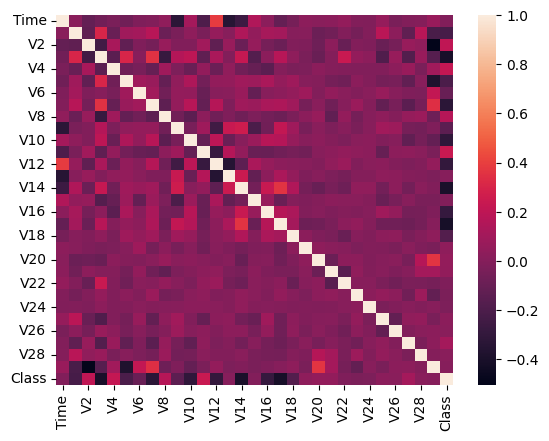

In [22]:
sns.heatmap(df.corr())
plt.show()

**INFERENCE**

 These correlations can be used to understand the relationships between different features in the dataset.
 For example, the strong positive correlation between V1 and V2 suggests that these two features are likely to move in the same direction.
The strong negative correlation between V1 and V3 suggests that these two features are likely to move in opposite directions.


Text(0.5, 1.0, 'Correlation Matrix for Credit Card Fraud Detection')

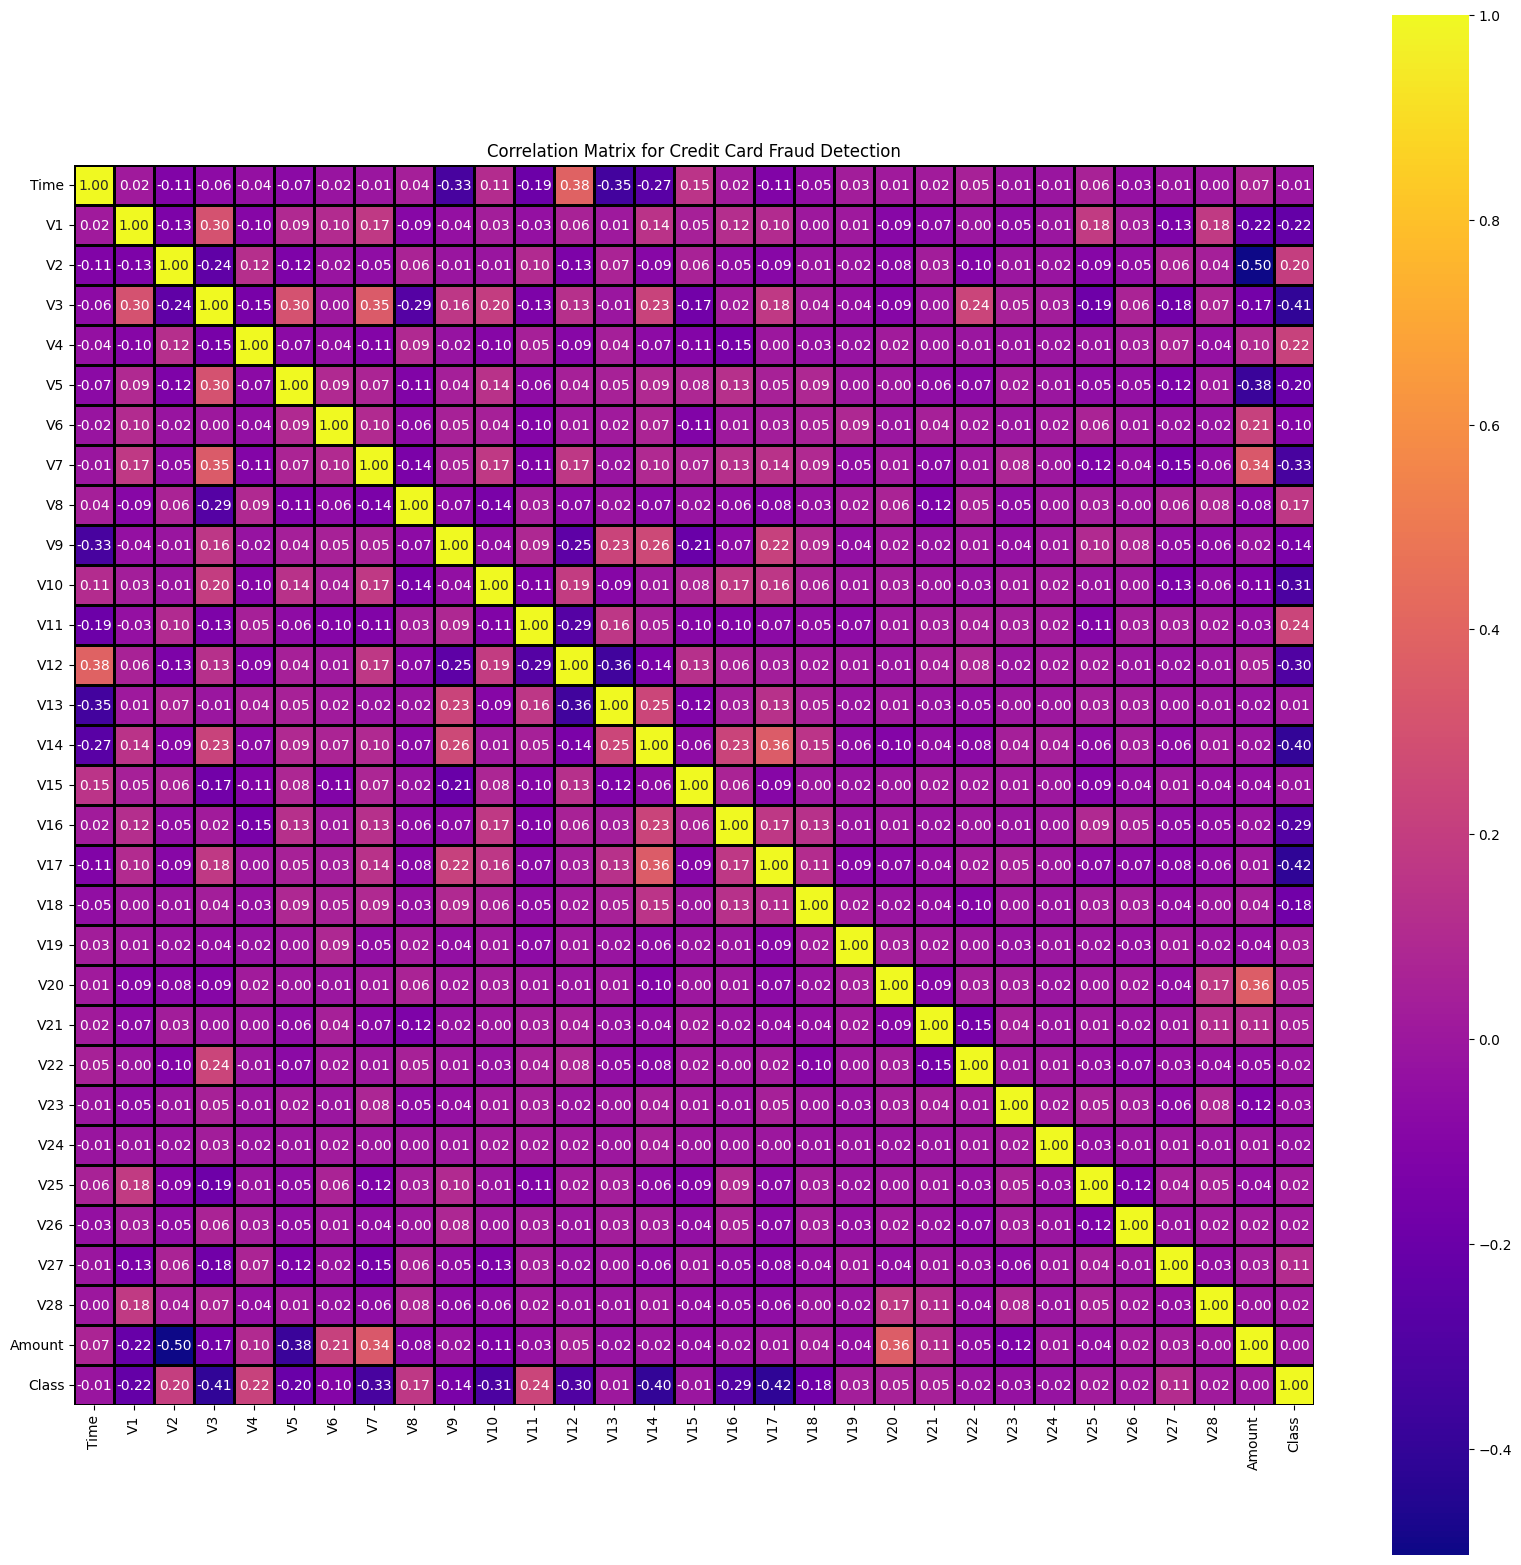

In [27]:
corr_mat=df.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat,annot=True,fmt="0.2f",square=True,cmap="plasma",linewidths=0.8,linecolor="Black")
plt.title("Correlation Matrix for Credit Card Fraud Detection")

In [36]:
x=df['Class']
y = y.dropna()
x = x.loc[y.index]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression

logistic=LogisticRegression(max_iter=10000)
# Reshape x_train to be a 2D array
logistic.fit(x_train.values.reshape(-1, 1),y_train)

LogisticRegression(max_iter=10000)

In [43]:
y_pred=logistic.predict(x_test.values.reshape(-1, 1)) # Reshape x_test to a 2D array before prediction
logistic.fit(x_train.values.reshape(-1, 1),y_train)
y_pred=logistic.predict(x_test.values.reshape(-1, 1))
print(y_pred)
acc=accuracy_score(y_test,y_pred)

[0. 0. 0. ... 0. 0. 0.]


In [44]:
print(f"accuracy score = {acc}")

accuracy score = 1.0


In [45]:

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# ynthetic minority oversampling in machine learning. It generates synthetic samples to balance imbalanced datasets, specifically targeting the minority class.
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train.values.reshape(-1, 1), y_train)

logistic.fit(X_train_resampled, y_train_resampled)
y_pred_smote = logistic.predict(x_test.values.reshape(-1, 1))

precision_smote = precision_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)

print(f"Precision (SMOTE): {precision_smote}")
print(f"Recall (SMOTE): {recall_smote}")
print(f"F1 Score (SMOTE): {f1_smote}")

# Undersampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(x_train.values.reshape(-1, 1), y_train)

logistic.fit(X_train_rus, y_train_rus)
y_pred_rus = logistic.predict(x_test.values.reshape(-1, 1))

precision_rus = precision_score(y_test, y_pred_rus)
recall_rus = recall_score(y_test, y_pred_rus)
f1_rus = f1_score(y_test, y_pred_rus)

print(f"Precision (RUS): {precision_rus}")
print(f"Recall (RUS): {recall_rus}")
print(f"F1 Score (RUS): {f1_rus}")


Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Precision (SMOTE): 1.0
Recall (SMOTE): 1.0
F1 Score (SMOTE): 1.0
Precision (RUS): 1.0
Recall (RUS): 1.0
F1 Score (RUS): 1.0
